In [9]:
using TuLiPa, Dates, DataFrames, CSV, JSON, Plots, JuMP, HiGHS, Statistics

In [10]:
path = joinpath(dirname(pwd()), "data/testprofiles_1981_2010.csv")
dfmt = dateformat"yyyy-mm-dd HH:MM:SS"
df = CSV.read(path, DataFrame)
df.Timestamp = DateTime.(df.Timestamp, dfmt)
df

Row,Timestamp,DemandGER,SolarGER,WindGER,DemandNO2,InflowResNO2,WindNO2,RoRNO2
,DateTime,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1980-12-29T00:00:00,0.75027,0.0,0.68678,0.98305,0.37142,0.9013,0.37142
2,1980-12-29T01:00:00,0.72027,0.0,0.66526,0.94338,0.37142,0.82434,0.37142
3,1980-12-29T02:00:00,0.70846,0.0,0.64889,0.92959,0.37142,0.88638,0.37142
4,1980-12-29T03:00:00,0.7154,0.0,0.63115,0.93098,0.37142,0.93408,0.37142
5,1980-12-29T04:00:00,0.74377,0.0,0.61476,0.94797,0.37142,0.99144,0.37142
6,1980-12-29T05:00:00,0.81326,0.0,0.58921,1.00004,0.37142,0.99124,0.37142
7,1980-12-29T06:00:00,0.96584,0.0,0.5595,1.16481,0.37142,0.97255,0.37142
8,1980-12-29T07:00:00,1.08374,0.0,0.55022,1.35096,0.37142,0.97056,0.37142
9,1980-12-29T08:00:00,1.14466,0.0,0.54902,1.40869,0.37142,0.97875,0.37142


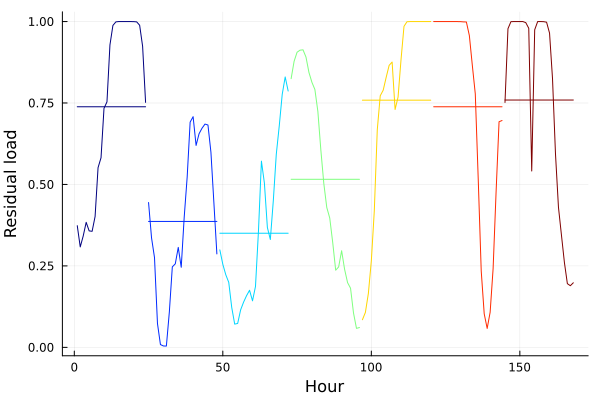

In [73]:
colors = palette(:jet, 7)
uke = 6
vector = df[!,"WindNO2"][(1+168*(uke-1)):(168*(uke))]
p = plot(legend = false, xlabel="Hour", ylabel="Residual load")
for i in 1:7
    indexes = collect((1 + 24*(i-1)):(24*i))
    plot!(p, indexes, vector[indexes], color=colors[i])
    m = mean(vector[indexes])
    plot!(p, indexes, repeat([m], 24), color=colors[i])
end

display(p)

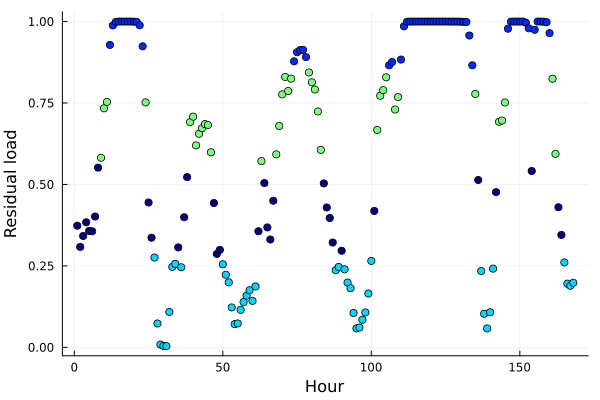

In [74]:
using Clustering
result = kmeans(reshape(vector, 1, length(vector)), 4)
result.assignments

scatter(1:length(vector), vector, color=colors[result.assignments], legend=false, xlabel="Hour", ylabel="Residual load")